## ProbSpace米国株式市場　将来株価予測

In [1]:
#環境確認
import pandas as pd
import numpy as np
import statsmodels
!python3 --version
print(pd.__version__)
print(np.__version__)
print(statsmodels.__version__)
import matplotlib
print(matplotlib.__version__)

Python 3.7.4
1.2.0
1.17.2
0.10.1
3.1.1


In [10]:
#データの読み込みと前処理
import pandas as pd
train_data = pd.read_csv("train_data.csv", index_col='Date')
print(train_data.shape)

(420, 3278)


In [3]:
train_data.head()

,VGSH,JEF,IVZ,KTCC,FBZ,PLOW,JBK,IAC,IVR,VSH,...,ASFI,JTA,MNR,TFSL,GTN,TYG,VIRC,BIS,WOOD,MASI
Date,,,,,,,,,,,,,,,,,,,,,
2011/11/13,55.942184,17.649006,13.770864,4.77,13.818835,10.198389,12.440549,38.484608,4.836254,8.575465,...,3.721562,4.747546,5.567790,7.262252,1.80,20.079035,1.504111,826.767029,30.918266,18.430309
2011/11/20,55.978844,16.270664,12.719761,4.94,12.744166,10.035272,12.065370,36.252533,4.658076,7.657301,...,3.590744,4.549112,5.473421,7.125532,1.56,19.711763,1.474619,769.836304,29.410889,17.534525
2011/11/27,56.021038,18.813454,14.402946,4.82,13.918125,10.510439,12.285713,39.479744,4.966706,8.611118,...,3.608788,4.851724,5.372760,7.616116,1.70,20.698137,1.572927,672.212830,31.723339,19.631044
2011/12/4,56.002697,18.425301,14.758045,4.73,13.994051,10.652282,12.148743,38.856613,4.680348,8.406092,...,3.541123,4.931097,5.498586,7.350718,1.74,20.010817,1.779373,694.906921,31.577734,19.383274
2011/12/11,56.030224,17.676432,13.664331,4.55,13.445042,10.449807,12.053457,38.624111,4.772620,7.719699,...,3.577211,4.734335,5.662159,6.956642,1.74,20.336115,1.297665,702.928040,30.412945,18.201599


## データの確認と前処理

In [11]:
train_data = train_data[:-1]

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

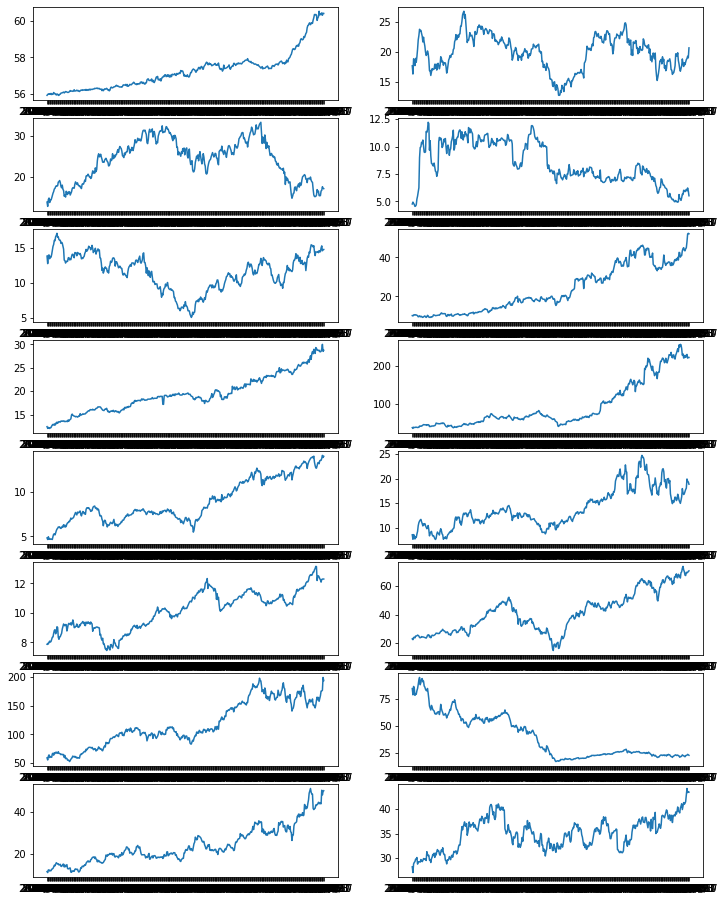

In [13]:
fig = plt.figure(figsize=(12, 16))

for i in range(16):
    ax = fig.add_subplot(8, 2, i+1)
    ax.plot(train_data.iloc[:, i])

In [14]:
train_data.dtypes

VGSH    float64
JEF     float64
IVZ     float64
KTCC    float64
FBZ     float64
         ...   
TYG     float64
VIRC    float64
BIS     float64
WOOD    float64
MASI    float64
Length: 3278, dtype: object

In [15]:
all(train_data.dropna() == train_data)

True

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


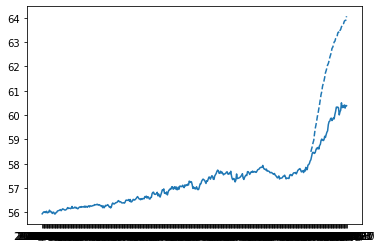

In [16]:
from statsmodels.tsa.api import VAR
m=VAR(train_data.values[:-50])
r=m.fit(5)
p=r.forecast(train_data.values[:-50],50) 
plt.plot(train_data.iloc[:,0])
plt.plot(range(len(train_data.values)-50,len(train_data.values)),p[:,0],c="tab:blue",linestyle="--")

In [17]:
from sklearn.metrics import mean_squared_log_error
eval_model = VAR(train_data.values[:-1])
eval_results = eval_model.fit(5)
eval_pred = eval_results.forecast(train_data.values[:-1], 1)
eval_pred[eval_pred < 0] = 0
print(np.sqrt(mean_squared_log_error(eval_pred.flatten(), train_data.values[-1])))

0.13146333787499256


In [ ]:
pred = eval_results.forecast(train_data.values, 1)

In [ ]:
submit_df = pd.DataFrame(pred, columns=train_data.columns)

In [ ]:
submit_df = submit_df.transpose()
submit_df.columns = ['y']
submit_df.index.name = 'id'
submit_df.where(submit_df['y'] > 0, 0)

In [ ]:
submit_df.to_csv('submission.csv')